### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [7]:
data = pd.read_csv('data/coupons.csv')

In [8]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [10]:
#Missing data
missing_data = data.isnull().mean().multiply(100).round(2)
print(missing_data)

#Duplicate data
dupe_data = data.duplicated().sum()
print("The number of duplicate values are "+str(dupe_data))

data.describe()

destination              0.00
passanger                0.00
weather                  0.00
temperature              0.00
time                     0.00
coupon                   0.00
expiration               0.00
gender                   0.00
age                      0.00
maritalStatus            0.00
has_children             0.00
education                0.00
occupation               0.00
income                   0.00
car                     99.15
Bar                      0.84
CoffeeHouse              1.71
CarryAway                1.19
RestaurantLessThan20     1.02
Restaurant20To50         1.49
toCoupon_GEQ5min         0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ25min        0.00
direction_same           0.00
direction_opp            0.00
Y                        0.00
dtype: float64
The number of duplicate values are 74


,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


3. Decide what to do about your missing data -- drop, replace, other...

In [12]:
# Dropping column "car" as the type of car is irrelevant 
data = data.drop('car', axis=1, errors='ignore')

#dropping rows missing data
data = data.dropna()

#Removing duplicates
data = data.drop_duplicates()

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12007 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12007 non-null  object
 1   passanger             12007 non-null  object
 2   weather               12007 non-null  object
 3   temperature           12007 non-null  int64 
 4   time                  12007 non-null  object
 5   coupon                12007 non-null  object
 6   expiration            12007 non-null  object
 7   gender                12007 non-null  object
 8   age                   12007 non-null  object
 9   maritalStatus         12007 non-null  object
 10  has_children          12007 non-null  int64 
 11  education             12007 non-null  object
 12  occupation            12007 non-null  object
 13  income                12007 non-null  object
 14  Bar                   12007 non-null  object
 15  CoffeeHouse           12007 non-null  ob

4. What proportion of the total observations chose to accept the coupon?



In [14]:
# Calculating percentage of people who accepted coupon
proportion = data[data['Y'] == 1].shape[0] *100 /data.shape[0]
print("The proportion that chose to accept the coupon is " + str(round(proportion,2))+"%")

The proportion that chose to accept the coupon is 56.84%


5. Use a bar plot to visualize the `coupon` column.

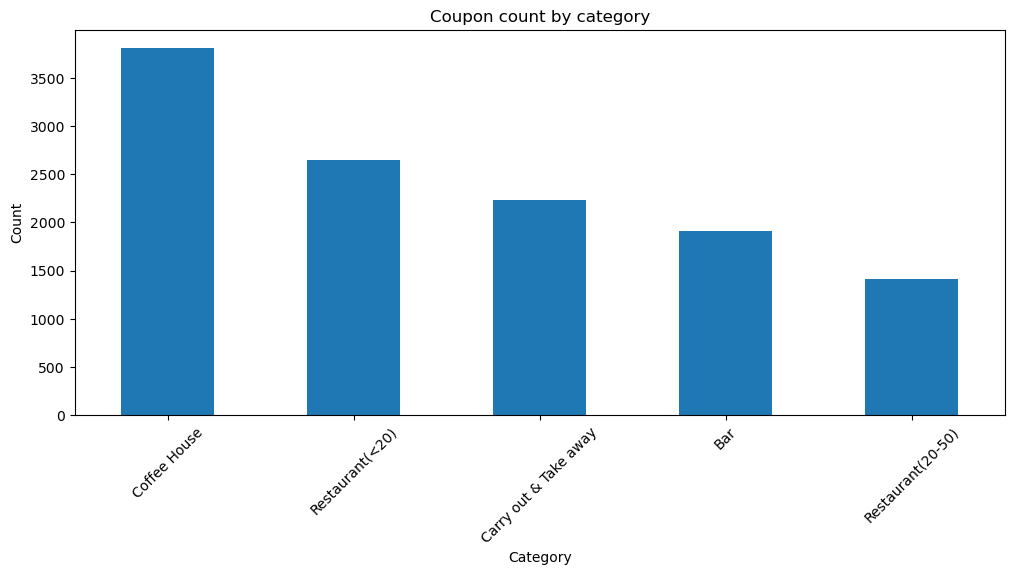

In [16]:
# Count the number of times for each type
coupon_counts = data['coupon'].value_counts()

coupon_counts.plot(kind="bar",figsize=(12,5))
plt.xticks(rotation=45) 
plt.title('Coupon count by category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

6. Use a histogram to visualize the temperature column.

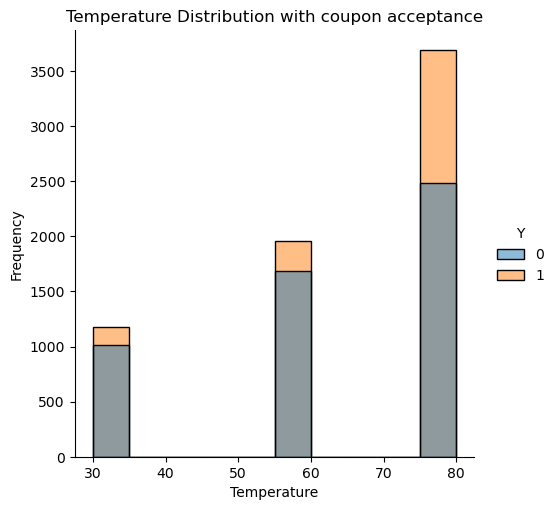

In [18]:
# Histogram to visualize temperature with coupon acceptance.
sns.displot(data, x="temperature", hue="Y", bins=10)
plt.title('Temperature Distribution with coupon acceptance')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [20]:
# Creating new dataframe where coupon is Bar
bar_data = data[data['coupon']=='Bar']
bar_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1906 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1906 non-null   object
 1   passanger             1906 non-null   object
 2   weather               1906 non-null   object
 3   temperature           1906 non-null   int64 
 4   time                  1906 non-null   object
 5   coupon                1906 non-null   object
 6   expiration            1906 non-null   object
 7   gender                1906 non-null   object
 8   age                   1906 non-null   object
 9   maritalStatus         1906 non-null   object
 10  has_children          1906 non-null   int64 
 11  education             1906 non-null   object
 12  occupation            1906 non-null   object
 13  income                1906 non-null   object
 14  Bar                   1906 non-null   object
 15  CoffeeHouse           1906 non-null   obj

2. What proportion of bar coupons were accepted?


In [22]:
# Calculating the percentage of people going to the bar accepting coupon 
bar_proportion = bar_data[bar_data['Y'] == 1].shape[0] *100 /bar_data.shape[0]
print("The proportion that chose to accept the coupon is " + str(round(bar_proportion,2))+"%")

The proportion that chose to accept the coupon is 41.19%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
bar_data.loc[bar_data["Bar"].isin(["never", "less1", "1~3"]), "Bar_Frequency"] = "No"
bar_data.loc[bar_data["Bar"].isin(["4~8", "gt8"]), "Bar_Frequency"] = "Yes"

acceptance_data = bar_data.groupby(["Bar_Frequency", "Y"])["Y"].value_counts().reset_index()
acceptance_rate_table = acceptance_data[acceptance_data['Y'] == 1]

total_count = bar_data["Bar_Frequency"].value_counts().reset_index()
total_count.columns = ["Bar_Frequency", "total_count"]

acceptance_rate_table = acceptance_rate_table.merge(total_count, on="Bar_Frequency")


acceptance_rate_table["Acceptance_Rate"] = (acceptance_rate_table["count"] / acceptance_rate_table["total_count"] * 100).round(2)


acceptance_rate_table = acceptance_rate_table[["Bar_Frequency", "Acceptance_Rate"]]
print(acceptance_rate_table)

  Bar_Frequency  Acceptance_Rate
0            No            37.24
1           Yes            76.17


C:\Users\imami\AppData\Local\Temp\ipykernel_13564\332233764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bar_data.loc[bar_data["Bar"].isin(["never", "less1", "1~3"]), "Bar_Frequency"] = "No"


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


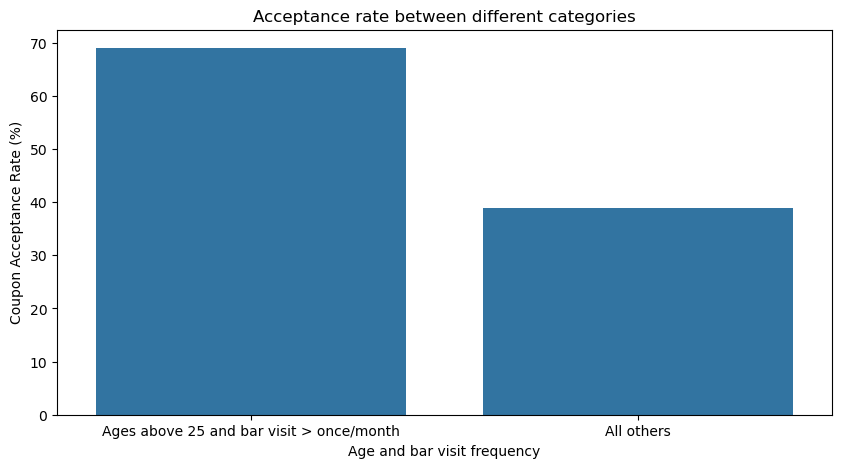

Yes, the acceptance rate of drivers over 25 who visit bars more frequently is higher by 30.15% compared to all others


In [26]:
# Dataframe with ages over 25 and bar visits > 1
bar_data_ageover25_barvisitover1 = bar_data.query('age in ["26", "31", "36", "41", "46", "50plus"] and Bar in ["1~3", "4~8", "gt8"]')

# Dataframe with ages under 25 and bar visits < 1
all_others = bar_data.query('age in ["below21", "21"] and Bar in ["less1", "never"]')

acceptance_rate_over25 = round(bar_data_ageover25_barvisitover1.query("Y == 1").shape[0] * 100/ bar_data_ageover25_barvisitover1.shape[0],2)
acceptance_rate_all_others = round(all_others.query("Y == 1").shape[0] * 100 / all_others.shape[0],2)

plt.figure(figsize=(10, 5))
sns.barplot(x=["Ages above 25 and bar visit > once/month", "All others"], y=[acceptance_rate_over25, acceptance_rate_all_others])
plt.title("Acceptance rate between different categories")
plt.xlabel("Age and bar visit frequency")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.show()

# Print acceptance rates
print("Yes, the acceptance rate of drivers over 25 who visit bars more frequently is higher by " + str(round(acceptance_rate_over25 - acceptance_rate_all_others, 2)) + "% compared to all others")


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


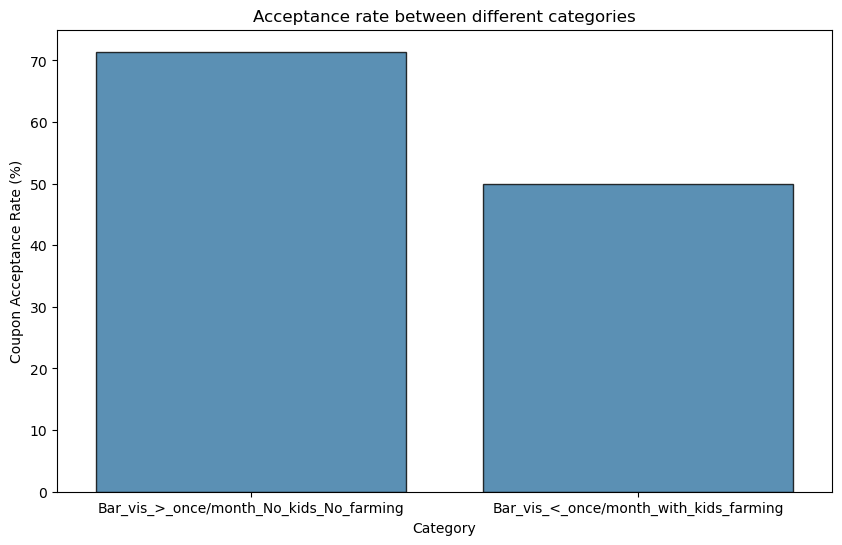

Acceptance rate for drivers visiting bars more than once/month: 71.43%
Acceptance rate for drivers visiting bars less than once/month: 50.0%


In [28]:
# Filter for drivers with bar visits > once/month, no kids, and no farming occupation
bar_over1_no_kids_no_farming = bar_data.query('Bar in ["1~3", "4~8", "gt8"] and passanger in ["Partner", "Friend(s)"] and occupation != "Farming Fishing & Forestry"')
acceptance_rate_over_1 = round(bar_over1_no_kids_no_farming.query("Y == 1").shape[0] / bar_over1_no_kids_no_farming.shape[0] * 100, 2)

# Filter for drivers with bar visits < once/month, kids or alone as passengers, and farming occupation
bar_less1_kids_farming = bar_data.query('Bar in ["never", "less1"] and passanger in ["Kid(s)", "Alone"] and occupation == "Farming Fishing & Forestry"')
acceptance_rate_less_1 = round(bar_less1_kids_farming.query("Y == 1").shape[0] / bar_less1_kids_farming.shape[0] * 100, 2)

# Plotting the Bar chart for Acceptance Rates
plt.figure(figsize=(10, 6))
sns.barplot(x=["Bar_vis_>_once/month_No_kids_No_farming", "Bar_vis_<_once/month_with_kids_farming"], y=[acceptance_rate_over_1, acceptance_rate_less_1], alpha=0.8, edgecolor="black")
plt.title("Acceptance rate between different categories")
plt.xlabel("Category")
plt.ylabel("Coupon Acceptance Rate (%)")
plt.show()

# Print acceptance rates
print("Acceptance rate for drivers visiting bars more than once/month: "+str(acceptance_rate_over_1)+"%")
print("Acceptance rate for drivers visiting bars less than once/month: "+str(acceptance_rate_less_1)+"%")


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



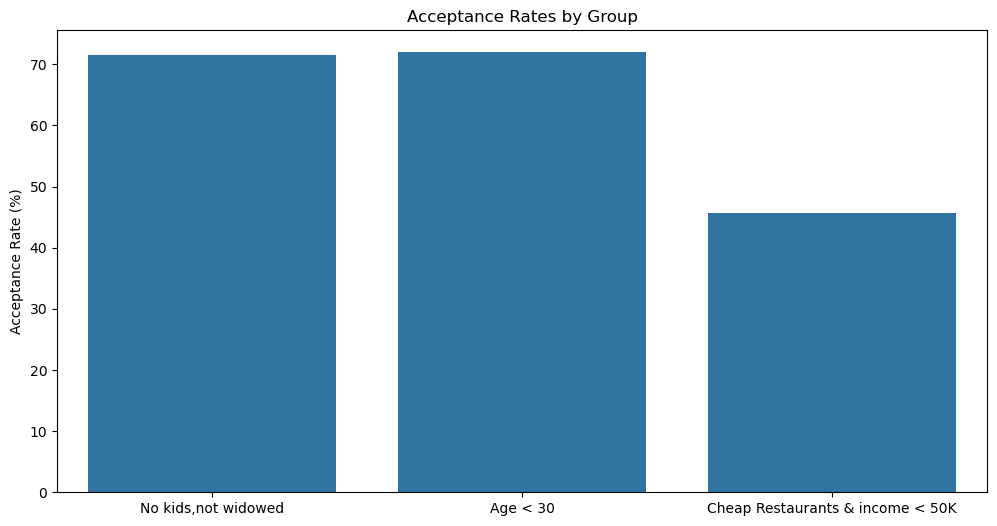

In [44]:
# Common filters
bar_over_1 = bar_data["Bar"].isin(["1~3", "4~8", "gt8"])

#Acceptance rate: bar >1/month, no kids, not widowed
no_kids = bar_data["passanger"].isin(["Partner", "Friend(s)"])
not_widowed = bar_data["maritalStatus"] != "Widowed"
bd1 = bar_data[bar_over_1 & no_kids & not_widowed]
rate_not_widowed = round(bd1[bd1["Y"] == 1].shape[0] / bd1.shape[0] * 100, 2)

#Acceptance rate: bar >1/month, age < 30
age_below_30 = bar_data["age"].isin(["below21", "21", "26"])
bd2 = bar_data[bar_over_1 & age_below_30]
rate_age_below_30 = round(bd2[bd2["Y"] == 1].shape[0] / bd2.shape[0] * 100, 2)

#Acceptance rate: cheap restaurants >4x/month and income < 50K
cheap_rest = bar_data["RestaurantLessThan20"].isin(["4~8", "gt8"])
low_income = bar_data["income"].isin(["Less than $12500", "$12500 - $24999", "$25000 - $37499", "$37500 - $49999"])
bd3 = bar_data[cheap_rest & low_income]
rate_cheap_rest_income_below_50k = round(bd3[bd3["Y"] == 1].shape[0] / bd3.shape[0] * 100, 2)

#Bar Plot of visual representation
plt.figure(figsize=(12, 6))
sns.barplot(x=["No kids,not widowed","Age < 30","Cheap Restaurants & income < 50K"], y=[rate_not_widowed,rate_age_below_30,rate_cheap_rest_income_below_50k])
plt.title("Acceptance Rates by Group")
plt.ylabel("Acceptance Rate (%)")
plt.show()



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [2]:
# Key Hypothesis about drivers who accept bar coupons
# 1. Slightly less than half the bar-goers would accept the coupons.
# 2. Amongst those who accept it, the people who have gone more than 3 times or more we likely to accept the coupons
# 3. Acceptance for bar-goers over 25 is higher
# 4. Surprisingly, there is low acceptance among people who visit cheap restaurants more than 4 times & have low income.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<class 'pandas.core.frame.DataFrame'>
Index: 3809 entries, 23 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3809 non-null   object
 1   passanger             3809 non-null   object
 2   weather               3809 non-null   object
 3   temperature           3809 non-null   int64 
 4   time                  3809 non-null   object
 5   coupon                3809 non-null   object
 6   expiration            3809 non-null   object
 7   gender                3809 non-null   object
 8   age                   3809 non-null   object
 9   maritalStatus         3809 non-null   object
 10  has_children          3809 non-null   int64 
 11  education             3809 non-null   object
 12  occupation            3809 non-null   object
 13  income                3809 non-null   object
 14  Bar                   3809 non-null   object
 15  CoffeeHouse           3809 non-null   obj

<Axes: xlabel='occupation'>

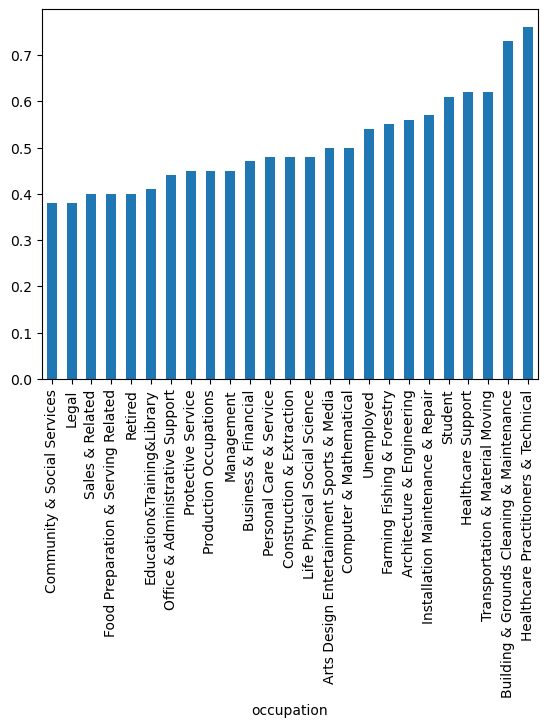

In [72]:
#Investigating coffee coupon group
coffee_data = data[data['coupon']=='Coffee House']
coffee_data.info()
coffee_data.groupby("occupation")["Y"].mean().round(2).sort_values().plot(kind = "bar")
# Healthcare worker seems to have the highest acceptance rate

In [70]:
# Calculating the percentage of people going to the Coffee House accepting the coupon 
coffee_proportion = coffee_data[coffee_data['Y'] == 1].shape[0] *100 /coffee_data.shape[0]
print("The proportion that chose to accept the coupon is " + str(round(coffee_proportion,2))+"%")
# The proportion is almost 10% higher 

The proportion that chose to accept the coupon is 49.57%


In [97]:
#By Gender
age_gender = coffee_data.groupby(["age","gender"])["Y"].mean().round(2).sort_values()
print(age_gender)
# Acceptance rate of Male below21 is the highest for the coffee coupon amongst others

age      gender
50plus   Male      0.41
46       Female    0.42
50plus   Female    0.42
31       Male      0.46
36       Female    0.47
         Male      0.47
41       Female    0.48
below21  Female    0.48
21       Male      0.50
26       Male      0.50
31       Female    0.50
41       Male      0.51
26       Female    0.52
21       Female    0.54
46       Male      0.59
below21  Male      0.82
Name: Y, dtype: float64
